<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/learning-Machine-learning/blob/main/SKLearn/Features_selection_PCA_RFE(CV)_SelectKBest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features selection and Dimensionality reductions

Source codes [Alura](https://cursos.alura.com.br/course/reducao-dimensionalidade)

## Import libraries

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import and manipulate the data

In [162]:
uri="https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"
resultados_exames = pd.read_csv(uri)
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


33 dimensions, given the 1st two columns are not exams.
Our goal will be to reduce the dimension, otherwise your algorithm tend to overfit. Our problem is the following. The health company needs 33 exams to determine whether a cancer is benign or malign. The health company wants to know if it can reach the same result (determine the type of cancer) using less exams.

NaN values represent an issue when using a ML later. 

In [163]:
resultados_exames.isnull().head() # see column of exam 33

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [164]:
resultados_exames.isnull().sum() # see that this is an issue only for exams_33

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

## Reduce features (dimensionality) : manually 

### Violin plot

Visualize the data with a violinplot. Such viz requires a data structure, 3 columns, one with the Y, the other stacking your X categories and the 3rd to use the colors

In [165]:
valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33") # excludes exam_33 which contains NaN in the column

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

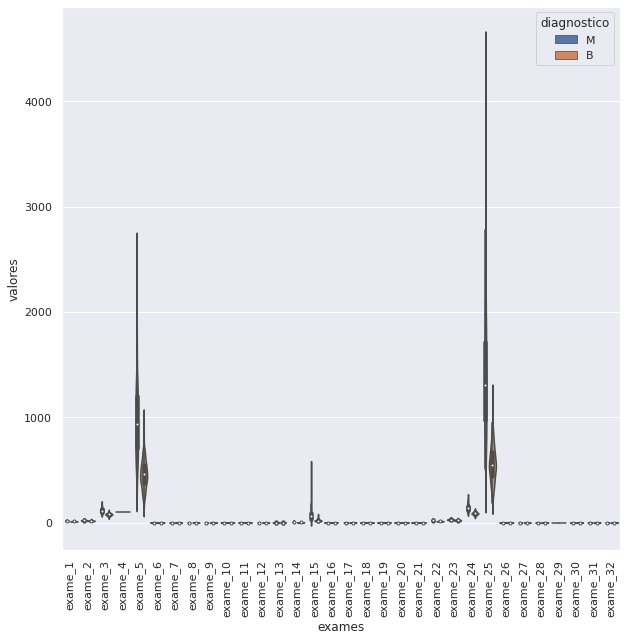

In [166]:
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1)
# you can visualize less columns at once. For example:
# dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot)

plt.xticks(rotation = 90) # rotate labels

Re-scale Y axis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

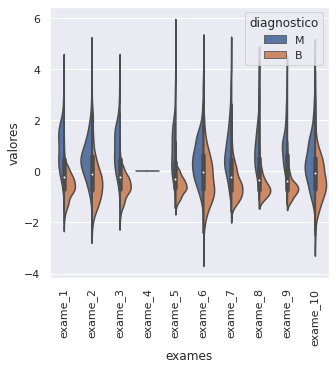

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1) # re-scale axis Y
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, # transform it to Dataframe to be used below in our dados_plot
                                columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1) # see only 10 first columns
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

plt.figure(figsize=(5,5))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot,
              split = True) # split=T joins the orange and blue violins

plt.xticks(rotation = 90)

From the above, several things can be verified. First exame_4 is constant. Exame_1, the orange curve has its central value lower than the blue one. This is the case for other exames, but not for exame_6, 10 and maybe 3 and 5. Therefore, exame_4 can be drop as it has no variability

In [168]:
valores_exames_v1.exame_4, # see they are all the same

(0      103.78
 1      103.78
 2      103.78
 3      103.78
 4      103.78
         ...  
 564    103.78
 565    103.78
 566    103.78
 567    103.78
 568    103.78
 Name: exame_4, Length: 569, dtype: float64,)

Create a function for the graph and inspect other columns

In [169]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(5,5))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

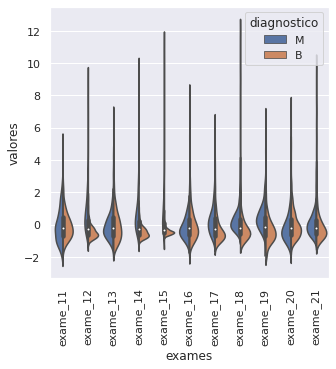

In [170]:
grafico_violino(valores_exames_v2, 10, 21)

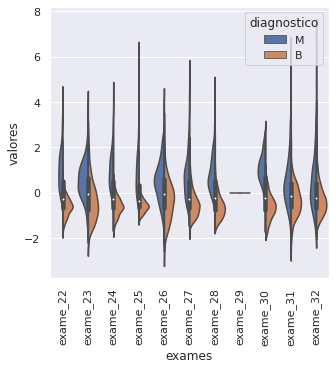

In [171]:
grafico_violino(valores_exames_v2, 21, 32)

### Correlation matrix

In [172]:
valores_exames_v3= valores_exames_v2.drop(columns=["exame_29","exame_4"]) # drop columns with values not varying

valores_exames_v3.corr().head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


Values with high correlations could be potentially discarded

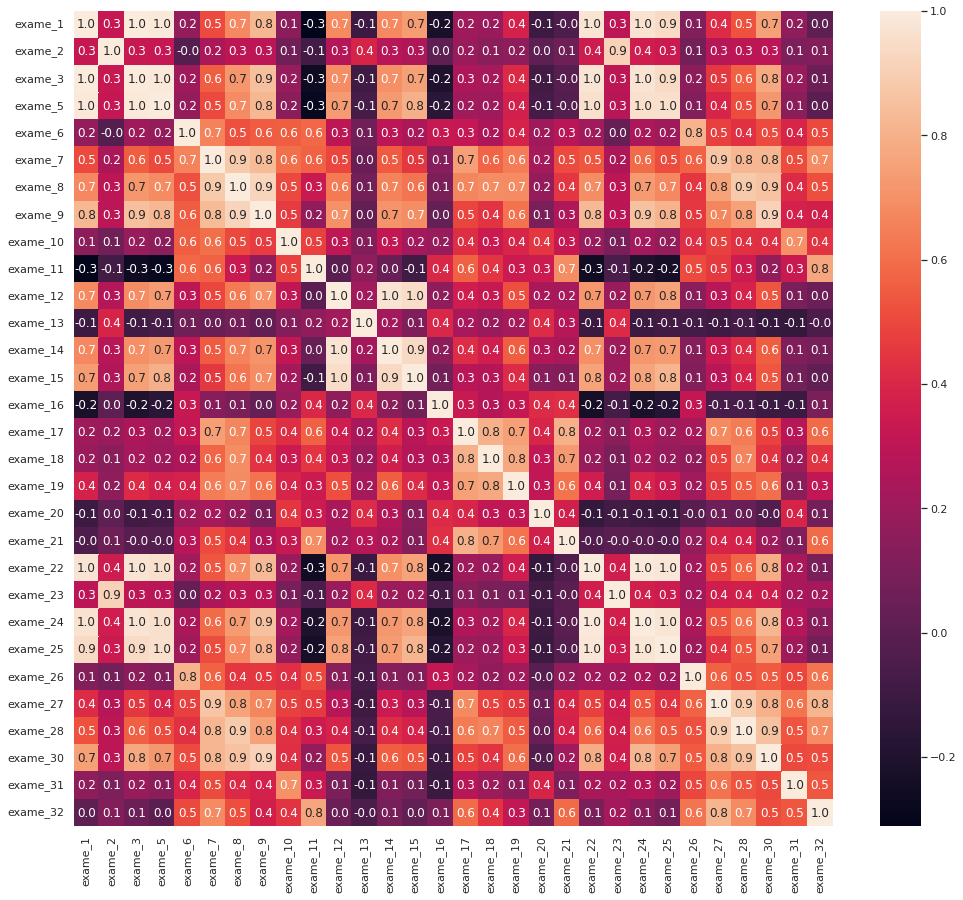

In [173]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize = (17, 15))

sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f") # fmt shows decimals and annot the label

You can filter only high correlated variables

In [174]:
matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas # exame_1, exame_3, 22 and 24 are highlhy correlated among themselves and can be dropped.

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Exame_1, exame_3, 22 and 24 are highlhy correlated among themselves. Therefore, two of them can be dropped.

In [176]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Reduce dimensions : select K best

SelectKBest from SK Learn will use only K number of variables from our initial database in a way to max the accuracy of an algorithm. However, it does not accept negative values (as we have already in valores_exames_v2-v5). 

In [177]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"]) # v6 only excludes the columns already excluded in v2-v5
valores_exames_v6.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f508c16ad40>)

# Machine learning algorithms

## Random forest ML algorithm with all, some and few (Kbest) features

Separate in train and test

### Using all dimensions

Random forest is an ensemble of decision trees

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33") # excludes exam_33 which contains NaN in the column

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3) # test size determines the size of the test dataset


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


You can verify how your train and test datasets look like

In [180]:
treino_y # teste_y, treino_x, teste_x

268    B
422    B
168    M
501    M
563    M
      ..
90     B
144    B
133    B
282    M
157    B
Name: diagnostico, Length: 398, dtype: object

### Removing some dimensions

Remember we had columns (dimensions, "exames") with constant values from the violin plots that could be drop. In this way we can start decreasing our dimensions already.

In [181]:
valores_exames_v3= valores_exames_v2.drop(columns=["exame_29","exame_4"]) # drop columns with values not varying
def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [182]:
classificar(valores_exames_v3) # see that the accuracy of the algorithm improved a bit without these 2 constant columns

Resultado da classificação 93.57%


Above we prepared a database wich excluded highly correlated variables. We could apply it here as it has less dimensions. See below a even better accuracy.

In [183]:
classificar(valores_exames_v5)

Resultado da classificação 94.15%


### Remove several dimensions

We can reduce our dimensions much more using the SelectKBest. In this case we set k=5, so 5 columns/dimensions

In [184]:
SEED = 123143
random.seed(SEED)
# using V6 here which has no negative numbers
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [185]:
teste_kbest.shape # see 5 columns, same for treino_kbest

(171, 5)

In [186]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=123143)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100)) 

Resultado da classificação 96.49%


Accuracy still higher but using less dimensions. Given that each column is an exam which is used to determine a disease, using 5 exams instead of 33 exams to feed our algorithm to detect the disease is great as it reduces a lot the costs.

### Baseline

Calculate a baseline to compare with the previous classificator. This baseline only guess the same number (a silly algorithm).

In [187]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100)) # baseline algorithm has an accuracy of 66,7%

Resultado da classificação boba 66.67%


## Confusion matrix

Using KBest

In [188]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[112,   2],
       [  4,  53]])

114 cases where my dependent variable=0 and 57 variable=1. From the 114, the algorithm classified 112 correctly, and from the 57 classified 53 correctly.

[Text(21.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

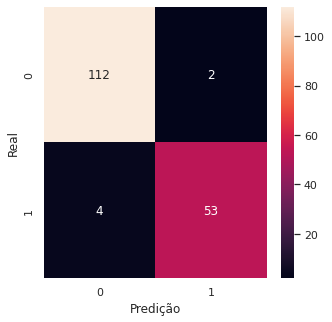

In [189]:
plt.figure(figsize = (5, 5))
sns.set(font_scale = 1)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

## RFE (recursive feature elimination)

This algorithm chooses the features according to its accuracy contribution to the model.

Lower performance

In [190]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234143)
classificador.fit(treino_x, treino_y)

# selecionador_rfe = RFE(estimator = , n_features_to_select = , step = )
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)


print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))



Resultado da classificação 92.98%


Using RFE

[Text(21.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

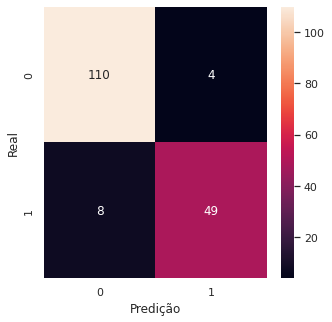

In [191]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (5, 5))
sns.set(font_scale = 1)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

## RFECV 

This algorithm uses RFE and applies to different parts of our dataset, then decides which features (or how many) have to be employed.

Resultado da classificação 93.57%


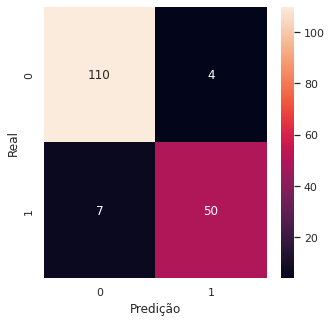

In [192]:
from sklearn.feature_selection import RFECV

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 123143)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (5, 5))
sns.set(font_scale = 1)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

How many features RFECV used? 21 listed and visualized below

In [193]:
selecionador_rfecv.n_features_ 

21

In [194]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show>

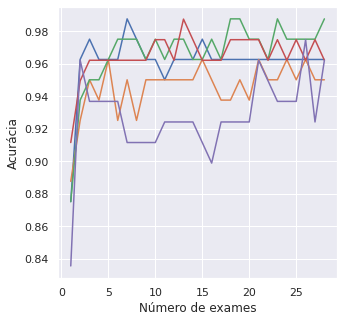

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show

## Visualization and PCA

Aim: visualize my initial dataset. But how? if you have so many dimensions?

In [198]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


You could for example visualize 2 dimensions first. Reduce the dimensions as done before. For example using RFE

In [199]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234143)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1) # change n from 5 to 2
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))


Resultado da classificação 91.23%


In [200]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape # you have 569 rows reduced to 2 dimensions now

(569, 2)

In [202]:
valores_exames_v7

array([[1.471e-01, 2.019e+03],
       [7.017e-02, 1.956e+03],
       [1.279e-01, 1.709e+03],
       ...,
       [5.302e-02, 1.124e+03],
       [1.520e-01, 1.821e+03],
       [0.000e+00, 2.686e+02]])

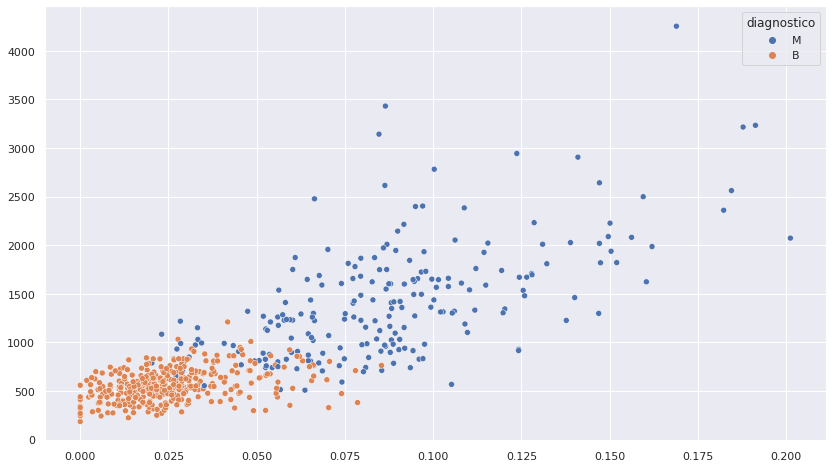

In [203]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

This is the distributon of our data. But this method is inefficient because by reducing the inital dataset to 2 dimensions is inaccurate because 2 is too low from the initial dataset with more than 30 dimensions.

### PCA

PCA transforms mathematically your data

First apply to V6

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

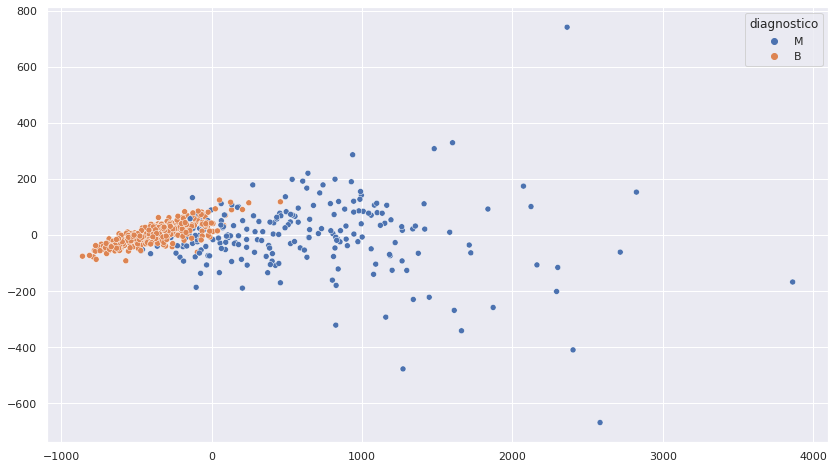

In [205]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

Now to V6

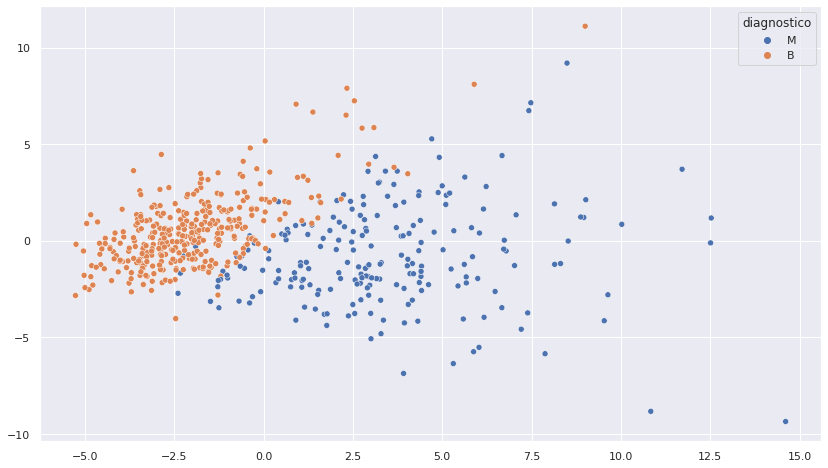

In [206]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

### TSNE : other form to visualize

Below you can clearly see the cases where the difference between M/B is not very clear

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


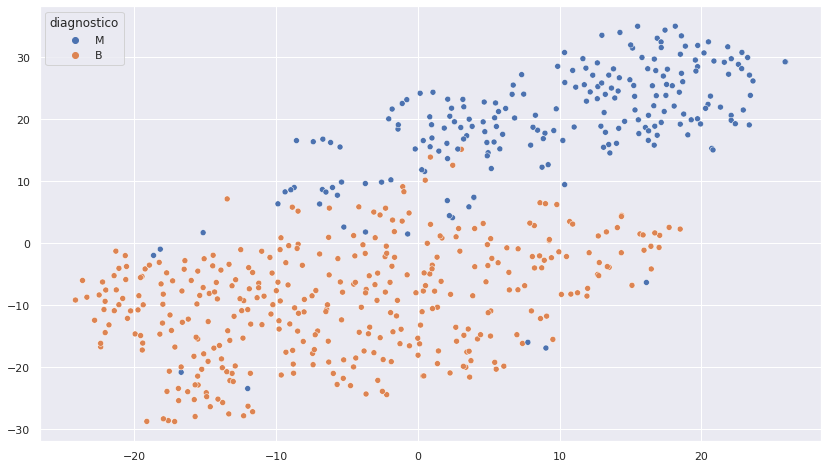

In [208]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

# Conclusion

We saw 2 types of techniques here. Features selection and dimensionality reduction (KBest, RFE, RFECV, PCA, TSE)

"dimensionality reduction" perform a mathematical transformation on the data before processing it, reducing its dimensions.

The difference between dimensionality reduction and feature selection is that the second works as a funnel that filters the main features of an original database.